<a href="https://colab.research.google.com/github/robert2999/machine_learning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived:Muerte
Pclass:Clase del que aborda
Name:Nombre
Sex:Sexo
Age:Edad
SibSp:hermano o conyuge en el titanic
PArch:Nombre de padres e hijos en el titanic
Ticket:Ticket del boleto
Fare:Tarifa
Cabin:Cabina
Embarked:Embarcacion


# Hacer analisis exploratorio de datos

In [5]:
survival_counts = df_train['Survived'].value_counts(normalize=True) * 100
display(survival_counts)

,proportion
Survived,
0,61.616162
1,38.383838


/tmp/ipython-input-773876132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')


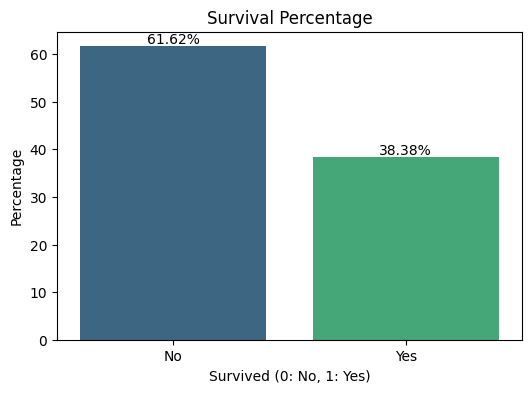

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')
plt.title('Survival Percentage')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Como el 61,62% de la poblacion a muerto , por lo tanto mi variable para hacer mi balance de valor constante va ser "0"

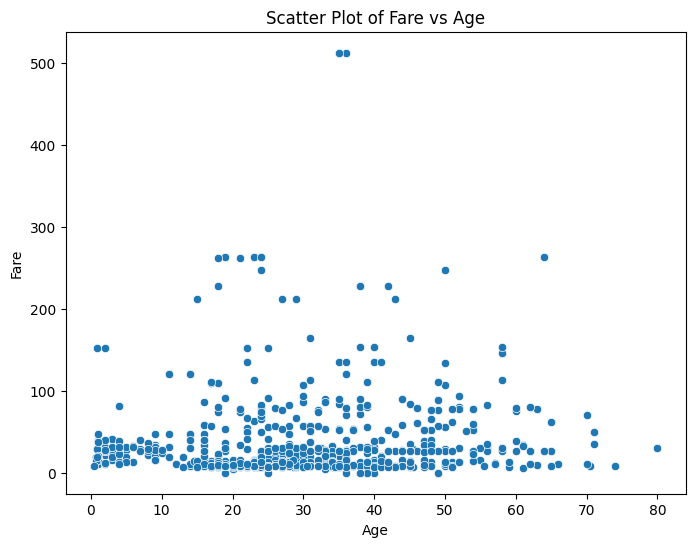

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='Age', y='Fare')
plt.title('Scatter Plot of Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

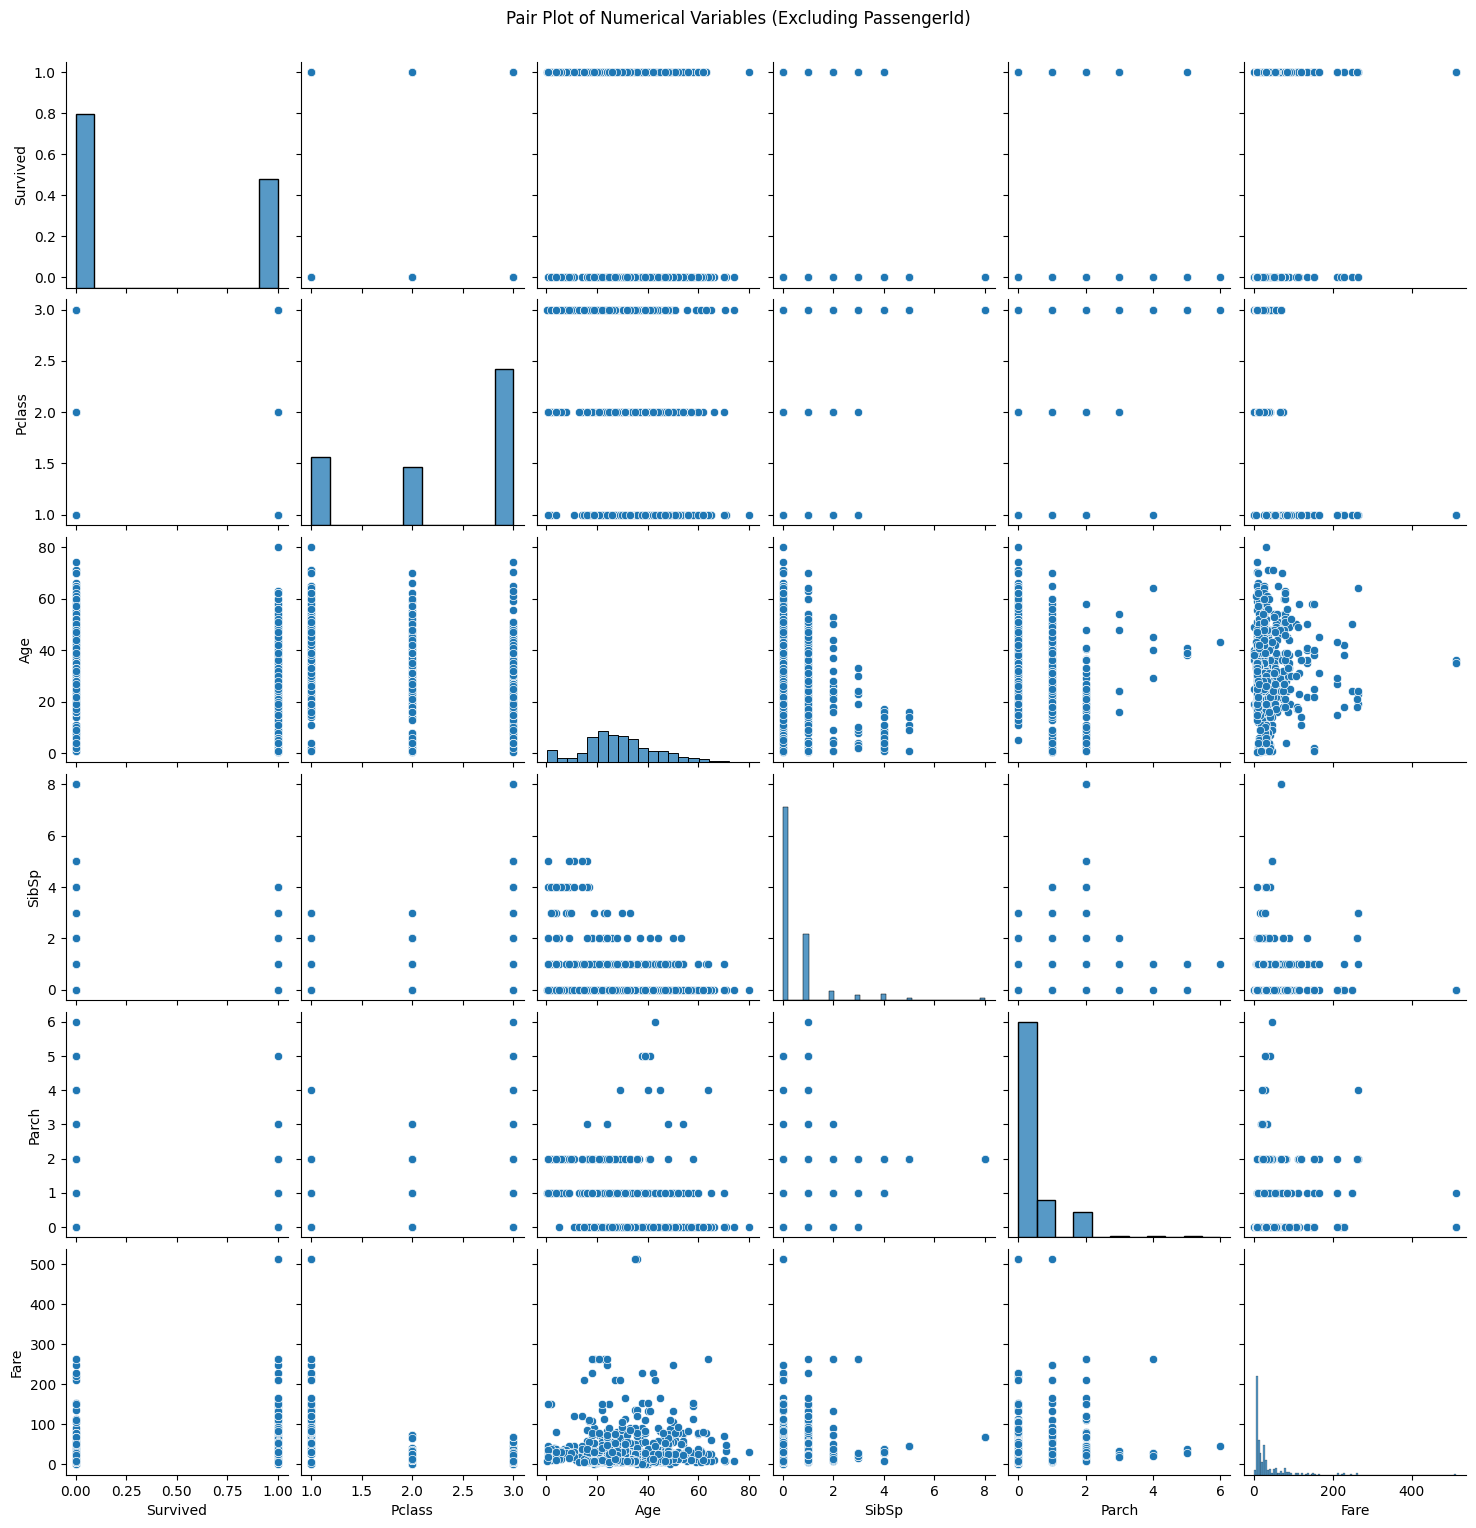

In [10]:
numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('PassengerId')

sns.pairplot(df_train[numeric_cols])
plt.suptitle('Pair Plot of Numerical Variables (Excluding PassengerId)', y=1.02)
plt.show()

Variables dependientes:Survived
variables independientes:Lo demas menos passegenID

In [ ]:
# dividicion de las variables independientes y dependientes

In [11]:
X = df_train.drop(['Survived', 'PassengerId'], axis=1)
y = df_train['Survived']

print("Independent variables (X):")
display(X.head())
print("\nDependent variable (y):")
display(y.head())

Independent variables (X):


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dependent variable (y):


,Survived
0,0
1,1
2,1
3,1
4,0


Divide la data en entrenamiento y validacion

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 10)
X_test shape: (179, 10)
y_train shape: (712,)
y_test shape: (179,)


In [13]:
# preprocesamiento de datos
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])

display(X_train.head())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,1,"Partner, Mr. Austen",male,1.104489,0,0,113043,-0.078684,C124,S
733,2,"Berriman, Mr. William John",male,-0.448587,0,0,28425,-0.377145,NaN,S
382,3,"Tikkanen, Mr. Juho",male,0.172644,0,0,STON/O 2. 3101293,-0.474867,NaN,S
704,3,"Hansen, Mr. Henrik Juul",male,-0.241510,1,0,350025,-0.476230,NaN,S
813,3,"Andersson, Miss. Ebba Iris Alfrida",female,-1.622022,4,2,347082,-0.025249,NaN,S


In [22]:
X_test[['Age', 'Fare']] = scaler.fit_transform(X_test[['Age', 'Fare']])

display(X_test.head())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,-0.392468,NaN,C
439,2,"Kvillner, Mr. Johan Henrik Johannesson",male,0.033836,0,0,C.A. 18723,-0.513112,NaN,S
840,3,"Alhomaki, Mr. Ilmari Rudolf",male,-0.719355,0,0,SOTON/O2 3101287,-0.578571,NaN,S
720,2,"Harper, Miss. Annie Jessie ""Nina""",female,-1.677961,0,1,248727,0.058863,NaN,S
39,3,"Nicola-Yarred, Miss. Jamila",female,-1.130186,1,0,2651,-0.494257,NaN,C
